# import necessary library

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn
random.seed(2019)

Text(33.0, 0.5, 'y label')

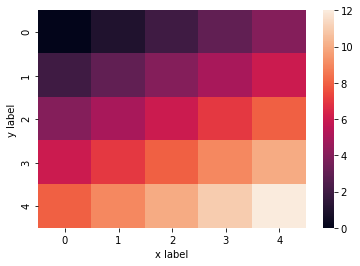

In [107]:
data = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        data[i][j] = 2*i + j
fig = seaborn.heatmap(data)
fig.set_xlabel("x label")
fig.set_ylabel("y label")

In [151]:
class State:
    def __init__(self, row, col):        
        self.row = row
        self.col = col
        
    def __repr__(self):
        return "row: %02d, col:%02d" %\
            (self.row, self.col)

    def copy(self):
        return State(self.row, self.col)
    
    
    @staticmethod
    def all_states():
        for row in range(5):
            for col in range(5):            
                s = State(row, col)
                yield s    
    
    @staticmethod
    def random():
        row = random.randint(0, 4)
        col = random.randint(0, 4)
        return State(row, col)
        
class Action:
    # action = one in ["up", "left", "right", "down"]
    action = "up"
    def __init__(self, action):
        self.action = action

    def __repr__(self):
        return self.action
    
    def isLeft(self):
        return self.action == "left"
    
    def isRight(self):
        return self.action == "right"
    
    def isDown(self):
        return self.action == "down"
    
    def isUp(self):
        return self.action == "up"
    
    def copy(self):
        return Action(self.action)
            
    @staticmethod
    def all_actions():
        return [Action("left"), Action("right"), Action("up"), Action("down")]
    
    @staticmethod
    def random():
        r = random.random()
        if r < 0.25:
            return Action("up")
        elif r < 0.5:
            return Action("down")
        elif r < 0.75:
            return Action("left")
        else:
            return Action("right")
        
    @staticmethod
    def parse(a_str):
        """
        a_str is a str representation of Action
        """
        return Action(a_str)
    
    
def simulate(s, a):
    """
    s is a instance of State
    a is a instance of Action
    
    simulate the environment
    return a new state and reward
    """
    r = 0
    if a.isLeft():
        s.col -= 1
    elif a.isRight():
        s.col += 1
    elif a.isUp():
        s.row -= 1
    elif a.isDown():
        s.row += 1
    else:
        raise Exception('invalid action')
    
    if s.col < 0 or s.col >= 5 or s.row < 0 or s.row >= 5:
        r = -1
        s.col = max(min(s.col, 4), 0)
        s.row = max(min(s.row, 4), 0)
    else:
        if s.row == 0 and s.col == 1:
            r = 10
            s.row = 4
        elif s.row == 0 and s.col == 3:
            r = 5
            s.row = 4
    return s, r

# evalution of policy
* random

In [193]:
def random_walk(s):
    """
    s: an instance of State
    """
    actions = Action.all_actions()
    return {actions[0] : 0.25, actions[1]: 0.25, actions[2]: 0.25, actions[3]: 0.25}
    
def prediction(times, policy):
    value = {}
    for s in State.all_states(): 
        value[str(s)] = 0.0
    for t in range(times):
        for s in State.all_states():          
            actions_prob = policy(s)
            new_v = 0
            for a, prob in actions_prob.items():               
                new_s, r = simulate(State.copy(s), a)
                new_v += prob * (r + 0.9 * value[str(new_s)])
            #print(">>> %s" % s)
            value[str(s)] = new_v
    return value
def print_value(v):
    for s in State.all_states():
        k = str(s)
        print(s, v.get(k, 0))

In [216]:
def print_policy(p):
    for s in State.all_states():
        k = str(s)
        print(s, p(k))

In [195]:
def plot_value(v):
    values = np.zeros((5, 5))
    for s in State.all_states():                
        k = str(s)
        values[s.row][s.col] = v.get(k, 0)
    ylabels = range(0, 5)
    xlables = range(0, 5)
    _, axe = plt.subplots(1, 1, figsize=(5, 4))
    
    title = "State --> Value"
    
    fig = seaborn.heatmap(values, cmap="YlGnBu", ax=axe, xticklabels=xlables, yticklabels=ylabels)
    fig.set_title(title)
    fig.set_xlabel("row")
    fig.set_ylabel("col")

In [196]:
v = prediction(1000, random_walk)
print_value(v)

row: 00, col:00 3.8254906075405897
row: 00, col:01 3.0042356305379787
row: 00, col:02 4.346289229299418
row: 00, col:03 1.623411284014073
row: 00, col:04 0.8474073883160689
row: 01, col:00 1.7925501600972118
row: 01, col:01 3.2872540016796963
row: 01, col:02 2.2028182588452547
row: 01, col:03 1.5091644717663197
row: 01, col:04 0.195689187699652
row: 02, col:00 0.17270594222566507
row: 02, col:01 0.8337780412986238
row: 02, col:02 0.6475956699001404
row: 02, col:03 0.21091688867688735
row: 02, col:04 -0.5714202135613652
row: 03, col:00 -0.9203410670629895
row: 03, col:01 -0.40187543025606354
row: 03, col:02 -0.369310211486809
row: 03, col:03 -0.6479315339855956
row: 03, col:04 -1.2637201453101305
row: 04, col:00 -1.8297830762976761
row: 04, col:01 -1.330239786109108
row: 04, col:02 -1.2391674233776322
row: 04, col:03 -1.457582238482595
row: 04, col:04 -2.022350975187933


In [197]:
v = prediction(10000, random_walk)
print_value(v)

row: 00, col:00 3.8254906075405897
row: 00, col:01 3.0042356305379787
row: 00, col:02 4.346289229299418
row: 00, col:03 1.623411284014073
row: 00, col:04 0.8474073883160689
row: 01, col:00 1.7925501600972118
row: 01, col:01 3.2872540016796963
row: 01, col:02 2.2028182588452547
row: 01, col:03 1.5091644717663197
row: 01, col:04 0.195689187699652
row: 02, col:00 0.17270594222566507
row: 02, col:01 0.8337780412986238
row: 02, col:02 0.6475956699001404
row: 02, col:03 0.21091688867688735
row: 02, col:04 -0.5714202135613652
row: 03, col:00 -0.9203410670629895
row: 03, col:01 -0.40187543025606354
row: 03, col:02 -0.369310211486809
row: 03, col:03 -0.6479315339855956
row: 03, col:04 -1.2637201453101305
row: 04, col:00 -1.8297830762976761
row: 04, col:01 -1.330239786109108
row: 04, col:02 -1.2391674233776322
row: 04, col:03 -1.457582238482595
row: 04, col:04 -2.022350975187933


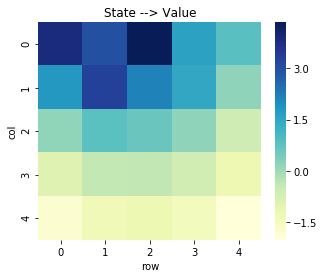

In [198]:
v = prediction(10000, random_walk)
plot_value(v)

# find the optimal policy
* Greedy

In [234]:
def greedy(value):
    """
    @param: value dict of state -> v
    return the optimal policy by the value
    """
    actions = {}
    for s in State.all_states():
        max_action = None
        max_value = None
        
        for a in Action.all_actions():
            new_s, r = simulate(State.copy(s), a)
            v = r + value[str(new_s)]
            if max_action is None:
                max_action = a
                max_value = v
            if v > max_value:
                max_action = a
                max_value = v
        max_value_count = 0
        
        for a in Action.all_actions():
            new_s, r = simulate(State.copy(s), a)
            v = r + value[str(new_s)]
            if v == max_value:
                max_value_count += 1
        
        for a in Action.all_actions():
            new_s, r = simulate(State.copy(s), a)
            v = r + value[str(new_s)]
            if v == max_value:
                if str(s) not in actions:
                    actions[str(s)] = {}
                actions[str(s)][a] = 1.0 / max_value_count
    def policy(s):
        return actions[str(s)]
    return policy


In [235]:
print_policy(random_walk)

row: 00, col:00 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 00, col:01 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 00, col:02 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 00, col:03 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 00, col:04 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 01, col:00 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 01, col:01 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 01, col:02 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 01, col:03 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 01, col:04 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 02, col:00 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 02, col:01 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 02, col:02 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 02, col:03 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 02, col:04 {left: 0.25, right: 0.25, up: 0.25, down: 0.25}
row: 03, col:00 {left: 0.25, right: 0.25

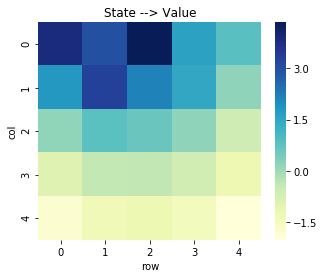

In [236]:
random_v = prediction(1000, random_walk)
plot_value(random_v)

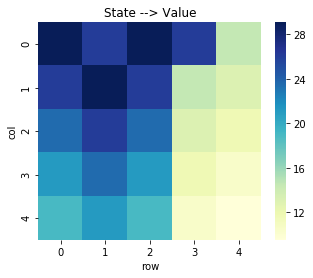

In [237]:
g_policy = greedy(random_v)
g_v = prediction(1000, g_policy)
plot_value(g_v)

In [238]:
print_policy(g_policy)

row: 00, col:00 {right: 1.0}
row: 00, col:01 {right: 1.0}
row: 00, col:02 {left: 1.0}
row: 00, col:03 {left: 1.0}
row: 00, col:04 {left: 1.0}
row: 01, col:00 {up: 1.0}
row: 01, col:01 {up: 1.0}
row: 01, col:02 {up: 1.0}
row: 01, col:03 {up: 1.0}
row: 01, col:04 {left: 1.0}
row: 02, col:00 {up: 1.0}
row: 02, col:01 {up: 1.0}
row: 02, col:02 {up: 1.0}
row: 02, col:03 {up: 1.0}
row: 02, col:04 {left: 1.0}
row: 03, col:00 {up: 1.0}
row: 03, col:01 {up: 1.0}
row: 03, col:02 {up: 1.0}
row: 03, col:03 {up: 1.0}
row: 03, col:04 {up: 1.0}
row: 04, col:00 {up: 1.0}
row: 04, col:01 {up: 1.0}
row: 04, col:02 {up: 1.0}
row: 04, col:03 {up: 1.0}
row: 04, col:04 {up: 1.0}


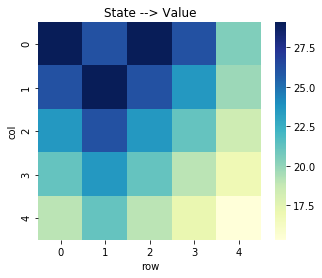

In [239]:
g_policy_1 = greedy(g_v)
g_v_1 = prediction(1000, g_policy_1)
plot_value(g_v_1)

In [240]:
print_policy(g_policy_1)

row: 00, col:00 {right: 1.0}
row: 00, col:01 {left: 0.3333333333333333, right: 0.3333333333333333, down: 0.3333333333333333}
row: 00, col:02 {left: 1.0}
row: 00, col:03 {left: 1.0}
row: 00, col:04 {left: 1.0}
row: 01, col:00 {right: 0.5, up: 0.5}
row: 01, col:01 {up: 1.0}
row: 01, col:02 {left: 0.5, up: 0.5}
row: 01, col:03 {left: 1.0}
row: 01, col:04 {left: 0.5, up: 0.5}
row: 02, col:00 {right: 0.5, up: 0.5}
row: 02, col:01 {up: 1.0}
row: 02, col:02 {left: 0.5, up: 0.5}
row: 02, col:03 {left: 1.0}
row: 02, col:04 {left: 0.5, up: 0.5}
row: 03, col:00 {right: 0.5, up: 0.5}
row: 03, col:01 {up: 1.0}
row: 03, col:02 {left: 0.5, up: 0.5}
row: 03, col:03 {left: 1.0}
row: 03, col:04 {left: 0.5, up: 0.5}
row: 04, col:00 {right: 0.5, up: 0.5}
row: 04, col:01 {up: 1.0}
row: 04, col:02 {left: 0.5, up: 0.5}
row: 04, col:03 {left: 1.0}
row: 04, col:04 {left: 0.5, up: 0.5}
